The questions I am trying to answer:
1) What was the frequency of trade or how many trades per day
2) Average profit and loss from each trade
3) Whats the risk reward ratio
4) Average holding period per security

In [4]:
import pandas as pd
import numpy as np

In [5]:
with open('All for tony, thinkorswim trade challenge winner2.txt') as f:
    table = pd.read_table(f, sep='\s+', engine='python', header=None,   lineterminator='\n')
# sep=' |:', engine='python'

In [6]:
table.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11/04/2016,02:21:43,PM,BOT,"+5,500",NEM,100,4,NOV,16,37.5,CALL,@.15,"$82,500.00"
1,11/04/2016,01:57:41,PM,SOLD,-300,UVXY,100,11,NOV,16,18.5,PUT,@2.25,"-$67,500.00"
2,11/04/2016,01:35:00,PM,BOT,+666,VXX,100,11,NOV,16,36.0,CALL,@3.40,"$226,440.00"
3,11/04/2016,01:27:59,PM,BOT,+200,TSLA,100,11,NOV,16,190.0,PUT,@4.60,"$92,000.00"
4,11/04/2016,01:07:58,PM,BOT,"+1,200",GPRO,100,11,NOV,16,11.5,PUT,@.70,"$84,000.00"


In [7]:
# table["1"]= table["2"] + table["3"]
table.iloc[:,0]=table.iloc[:,0]+" "+table.iloc[:,1]+""+table.iloc[:,2]
# table=table.drop(table.columns[[1,2]],axis=1)
table.iloc[:,5]=table.iloc[:,5]+" "+table.iloc[:,6].map(str)+" "+table.iloc[:,7].map(str)+" "+table.iloc[:,8].map(str)+" "+table.iloc[:,9].map(str)+" "+ \
table.iloc[:,10].map(str)+" "+table.iloc[:,11].map(str)
table=table.drop(table.columns[[1,2,6,7,8,9,10,11]],axis=1)
table.head()

,0,3,4,5,12,13
0,11/04/2016 02:21:43PM,BOT,"+5,500",NEM 100 4 NOV 16 37.5 CALL,@.15,"$82,500.00"
1,11/04/2016 01:57:41PM,SOLD,-300,UVXY 100 11 NOV 16 18.5 PUT,@2.25,"-$67,500.00"
2,11/04/2016 01:35:00PM,BOT,+666,VXX 100 11 NOV 16 36.0 CALL,@3.40,"$226,440.00"
3,11/04/2016 01:27:59PM,BOT,+200,TSLA 100 11 NOV 16 190.0 PUT,@4.60,"$92,000.00"
4,11/04/2016 01:07:58PM,BOT,"+1,200",GPRO 100 11 NOV 16 11.5 PUT,@.70,"$84,000.00"


In [8]:
import re
# table.iloc[:,13]=table.iloc[:,13].replace("@", "")
table.columns=['Time','Position','Quantity','Security','Price','Cash_flow']
# table["Price"].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
# table["Quantity"].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
# table["cash_flow"].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
# table.cash_flow = table.cash_flow.str.translate(None, "$") #use if u downgrading to python 2
# table.cash_flow = str(re.sub('[$]', '', str(table.cash_flow)))
table.Price =table.Price.str.replace('@','')
table.Price =table.Price.astype(float)
table.Cash_flow =table.Cash_flow.str.replace('$','')
table.Cash_flow =table.Cash_flow.str.replace(',','')
table.Cash_flow =table.Cash_flow.astype(float)
table.Quantity =table.Quantity.str.replace(',','')
table.Quantity = table.Quantity.astype(float)
table.head()

,Time,Position,Quantity,Security,Price,Cash_flow
0,11/04/2016 02:21:43PM,BOT,5500.0,NEM 100 4 NOV 16 37.5 CALL,0.15,82500.0
1,11/04/2016 01:57:41PM,SOLD,-300.0,UVXY 100 11 NOV 16 18.5 PUT,2.25,-67500.0
2,11/04/2016 01:35:00PM,BOT,666.0,VXX 100 11 NOV 16 36.0 CALL,3.40,226440.0
3,11/04/2016 01:27:59PM,BOT,200.0,TSLA 100 11 NOV 16 190.0 PUT,4.60,92000.0
4,11/04/2016 01:07:58PM,BOT,1200.0,GPRO 100 11 NOV 16 11.5 PUT,0.70,84000.0


In [9]:
# table.groupby('security').count()
# table.security.value_counts()

In [10]:
import datetime
import locale
locale.setlocale(locale.LC_ALL, "") # for datetime.strptime

# datetime_object = datetime.strptime('11/04/2016 02:21:43PM', '%x %I:%M:%S%p')
table.Time = pd.to_datetime(table.Time,format="%x %I:%M:%S%p")

table.head()

,Time,Position,Quantity,Security,Price,Cash_flow
0,2016-11-04 14:21:43,BOT,5500.0,NEM 100 4 NOV 16 37.5 CALL,0.15,82500.0
1,2016-11-04 13:57:41,SOLD,-300.0,UVXY 100 11 NOV 16 18.5 PUT,2.25,-67500.0
2,2016-11-04 13:35:00,BOT,666.0,VXX 100 11 NOV 16 36.0 CALL,3.40,226440.0
3,2016-11-04 13:27:59,BOT,200.0,TSLA 100 11 NOV 16 190.0 PUT,4.60,92000.0
4,2016-11-04 13:07:58,BOT,1200.0,GPRO 100 11 NOV 16 11.5 PUT,0.70,84000.0


In [11]:
# table.security.unique()
security = table.Security.unique()
average_holding_period =[0]* len(security)
total_profit =[0]* len(security)
average_profit =[0]* len(security)
number_of_trades=[0]* len(security)

trade_analyzis = {'security': security,'average_holding_period':[0]* len(security),\
                  'total_profit':[0]* len(security),'average_profit':[0]* len(security),'number_of_trades':[0]* len(security),\
                  'outstanding_quantity':[0]* len(security),'start_time':[0]* len(security),\
                  'direction':[0]* len(security)}


trade_analyzis = pd.DataFrame(trade_analyzis)
trade_analyzis.head()

,average_holding_period,average_profit,direction,number_of_trades,outstanding_quantity,security,start_time,total_profit
0,0,0,0,0,0,NEM 100 4 NOV 16 37.5 CALL,0,0
1,0,0,0,0,0,UVXY 100 11 NOV 16 18.5 PUT,0,0
2,0,0,0,0,0,VXX 100 11 NOV 16 36.0 CALL,0,0
3,0,0,0,0,0,TSLA 100 11 NOV 16 190.0 PUT,0,0
4,0,0,0,0,0,GPRO 100 11 NOV 16 11.5 PUT,0,0


Security | Average Holding Period | Total Profit | Average Profit | Number of trades | 


In [12]:
table.sort_values(by='Time',inplace=True)
table

# z.index[0] + dt.timedelta(minutes=5)


,Time,Position,Quantity,Security,Price,Cash_flow
117,2016-10-11 10:10:19,BOT,200.0,VXX 100 28 OCT 16 34.5 CALL,1.50,30000.0
116,2016-10-11 13:50:28,SOLD,-200.0,VXX 100 28 OCT 16 34.5 CALL,1.86,-37200.0
115,2016-10-11 14:11:19,BOT,300.0,VXX 100 21 OCT 16 34.5 PUT,1.48,44400.0
114,2016-10-11 14:22:10,BOT,100.0,SPY 100 14 OCT 16 213.0 CALL,1.40,14000.0
113,2016-10-11 14:27:21,SOLD,-300.0,VXX 100 21 OCT 16 34.5 PUT,1.60,-48000.0
112,2016-10-11 14:30:09,BOT,10.0,VXX 100 14 OCT 16 34.5 PUT,1.00,1000.0
111,2016-10-11 14:31:19,BOT,390.0,VXX 100 14 OCT 16 34.5 PUT,1.00,39000.0
110,2016-10-11 14:43:11,SOLD,-100.0,SPY 100 14 OCT 16 213.0 CALL,1.42,-14200.0
109,2016-10-11 14:54:37,SOLD,-400.0,VXX 100 14 OCT 16 34.5 PUT,1.02,-40800.0
108,2016-10-12 12:46:13,BOT,1000.0,VXX 100 14 OCT 16 33.5 PUT,0.49,49000.0


In [13]:
# This is where round trips are added up for each security traded. But based on the fact that there are some trades that are not
# closed at the end of the trading competition. Round trips needs to be seperated into seperate rows. So that we dont miss out
# trades. That will be done in the next section . UPDATE : Avoiding it now for simplicity purpose
for indx,row in table.iterrows():
    if trade_analyzis[trade_analyzis.security==row.Security].outstanding_quantity.item() == 0:
        trade_analyzis.loc[trade_analyzis.security==row.Security,'number_of_trades']+= 1
        if row.Position=='BOT':
            trade_analyzis.loc[trade_analyzis.security==row.Security,'direction']='Long'
        else:
            trade_analyzis.loc[trade_analyzis.security==row.Security,'direction']='Short'
            
#             trade_analyzis[trade_analyzis.security==row.Security].number_of_trades+1
            
    trade_analyzis.loc[trade_analyzis.security==row.Security,'total_profit'] = row.Cash_flow
#     print((trade_analyzis[trade_analyzis.security==row.Security].outstanding_quantity)+ int(row.Quantity))
    trade_analyzis.loc[trade_analyzis.security==row.Security,'outstanding_quantity'] += int(row.Quantity)
#     trade_analyzis.loc[trade_analyzis.security==row.Security,'outstanding_quantity']+int(row.Quantity)
    print(trade_analyzis[trade_analyzis.security==row.Security].outstanding_quantity)
    
    if (trade_analyzis[trade_analyzis.security==row.Security].outstanding_quantity.item() != 0):
        trade_analyzis.loc[trade_analyzis.security==row.Security,'start_time'] = row.Time
    else:
        print("poda",trade_analyzis[trade_analyzis.security==row.Security].start_time.item())
        print("maire",row.Time )
        trade_analyzis.loc[trade_analyzis.security==row.Security,'average_holding_period']+=\
        ((row.Time- trade_analyzis.loc[trade_analyzis.security==row.Security,'start_time'])/datetime.timedelta(hours=1))
        trade_analyzis[trade_analyzis.security==row.Security].average_holding_period = 0


    

54    200
Name: outstanding_quantity, dtype: int64
54    0
Name: outstanding_quantity, dtype: int64
poda 2016-10-11 10:10:19
maire 2016-10-11 13:50:28
36    300
Name: outstanding_quantity, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


53    100
Name: outstanding_quantity, dtype: int64
36    0
Name: outstanding_quantity, dtype: int64
poda 2016-10-11 14:11:19
maire 2016-10-11 14:27:21
52    10
Name: outstanding_quantity, dtype: int64
52    400
Name: outstanding_quantity, dtype: int64
53    0
Name: outstanding_quantity, dtype: int64
poda 2016-10-11 14:22:10
maire 2016-10-11 14:43:11
52    0
Name: outstanding_quantity, dtype: int64
poda 2016-10-11 14:31:19
maire 2016-10-11 14:54:37
49    1000
Name: outstanding_quantity, dtype: int64
51    1100
Name: outstanding_quantity, dtype: int64
51    0
Name: outstanding_quantity, dtype: int64
poda 2016-10-12 12:48:58
maire 2016-10-12 13:00:17
50    1000
Name: outstanding_quantity, dtype: int64
50    0
Name: outstanding_quantity, dtype: int64
poda 2016-10-12 13:05:11
maire 2016-10-12 13:10:01
48    630
Name: outstanding_quantity, dtype: int64
48   -630
Name: outstanding_quantity, dtype: int64
49    0
Name: outstanding_quantity, dtype: int64
poda 2016-10-12 12:46:13
maire 2016-10-12

In [14]:
trade_analyzis
trade_analyzis.total_profit.sum()
trade_analyzis.sum(axis=0)
trade_analyzis

,average_holding_period,average_profit,direction,number_of_trades,outstanding_quantity,security,start_time,total_profit
0,0.000000,0,Long,1,5500,NEM 100 4 NOV 16 37.5 CALL,2016-11-04 14:21:43,82500.0
1,1.099167,0,Long,1,0,UVXY 100 11 NOV 16 18.5 PUT,2016-11-04 12:51:44,-67500.0
2,0.000000,0,Long,1,276,VXX 100 11 NOV 16 36.0 CALL,2016-11-04 13:35:00,226440.0
3,0.123056,0,Long,2,200,TSLA 100 11 NOV 16 190.0 PUT,2016-11-04 13:27:59,92000.0
4,0.000000,0,Long,1,1200,GPRO 100 11 NOV 16 11.5 PUT,2016-11-04 13:07:58,84000.0
5,27.163056,0,Long,1,0,GDX 100 11 NOV 16 25.0 CALL,2016-11-03 08:36:15,-79000.0
6,51.593056,0,Long,1,0,UVXY 100 11 NOV 16 18.5 CALL,2016-11-01 11:11:31,-121800.0
7,51.215556,0,Long,1,0,YHOO 100 11 NOV 16 41.0 PUT,2016-11-01 11:33:19,-81200.0
8,6.115556,0,Long,1,0,NEM 100 11 NOV 16 37.5 CALL,2016-11-03 08:35:04,-81900.0
9,3.255556,0,Long,1,0,AET 100 4 NOV 16 105.0 PUT,2016-11-03 11:20:33,-9600.0


In [15]:
# trade_analyzis.loc[trade_analyzis.loc["VXX 100 21 OCT 16 34.5 PUT"].,average_holding_period]
trade_analyzis.loc[trade_analyzis.security=="VXX 100 14 OCT 16 34.5 PUT",'security']
# df.loc[df['column_name'] == some_value]
# trade_analyzis.[trade_analyzis==row.Security].average_holding_period = 0


52    VXX 100 14 OCT 16 34.5 PUT
Name: security, dtype: object

In [16]:
row=table.iloc[1,:]
(row.Time- trade_analyzis[trade_analyzis.security==row.Security].start_time)
# row.Security

54   03:40:09
Name: start_time, dtype: timedelta64[ns]

In [17]:
# (row.Time- trade_analyzis.loc[trade_analyzis.security==row.Security,'start_time'])/datetime.timedelta(hours=1)

In [18]:
import ystockquote
print(ystockquote.get_historical_prices('CHK', '2013-01-03', '2013-01-08'))

{'2013-01-08': {'Open': '17.500001', 'High': '17.550001', 'Low': '16.850001', 'Close': '16.880001', 'Volume': '15977900', 'Adj Close': '15.308872'}, '2013-01-07': {'Open': '17.39', 'High': '17.690001', 'Low': '17.290001', 'Close': '17.620001', 'Volume': '13597900', 'Adj Close': '15.979997'}, '2013-01-04': {'Open': '16.870001', 'High': '17.46', 'Low': '16.800001', 'Close': '17.45', 'Volume': '13450300', 'Adj Close': '15.825819'}, '2013-01-03': {'Open': '16.600001', 'High': '17.030001', 'Low': '16.410001', 'Close': '16.770001', 'Volume': '13666200', 'Adj Close': '15.209111'}}


In [19]:
# import re

# mystr = 'This is a string, with words!'
# wordList = re.sub("[^\w]", " ",  mystr).split()

# trade_analyzis.underlying = re.sub("[^\w]", " ",  trade_analyzis.security).split()[0]
trade_analyzis['underlying']=trade_analyzis.security.str.extract('([A-Z]\w{0,})', expand=True)

In [20]:
trade_analyzis

,average_holding_period,average_profit,direction,number_of_trades,outstanding_quantity,security,start_time,total_profit,underlying
0,0.000000,0,Long,1,5500,NEM 100 4 NOV 16 37.5 CALL,2016-11-04 14:21:43,82500.0,NEM
1,1.099167,0,Long,1,0,UVXY 100 11 NOV 16 18.5 PUT,2016-11-04 12:51:44,-67500.0,UVXY
2,0.000000,0,Long,1,276,VXX 100 11 NOV 16 36.0 CALL,2016-11-04 13:35:00,226440.0,VXX
3,0.123056,0,Long,2,200,TSLA 100 11 NOV 16 190.0 PUT,2016-11-04 13:27:59,92000.0,TSLA
4,0.000000,0,Long,1,1200,GPRO 100 11 NOV 16 11.5 PUT,2016-11-04 13:07:58,84000.0,GPRO
5,27.163056,0,Long,1,0,GDX 100 11 NOV 16 25.0 CALL,2016-11-03 08:36:15,-79000.0,GDX
6,51.593056,0,Long,1,0,UVXY 100 11 NOV 16 18.5 CALL,2016-11-01 11:11:31,-121800.0,UVXY
7,51.215556,0,Long,1,0,YHOO 100 11 NOV 16 41.0 PUT,2016-11-01 11:33:19,-81200.0,YHOO
8,6.115556,0,Long,1,0,NEM 100 11 NOV 16 37.5 CALL,2016-11-03 08:35:04,-81900.0,NEM
9,3.255556,0,Long,1,0,AET 100 4 NOV 16 105.0 PUT,2016-11-03 11:20:33,-9600.0,AET


In [21]:
# trade_analyzis.shape

In [22]:
# trade_analyzis[trade_analyzis.outstanding_quantity!=0]
trade_analyzis[trade_analyzis.number_of_trades>1]


,average_holding_period,average_profit,direction,number_of_trades,outstanding_quantity,security,start_time,total_profit,underlying
3,0.123056,0,Long,2,200,TSLA 100 11 NOV 16 190.0 PUT,2016-11-04 13:27:59,92000.0,TSLA
31,0.648611,0,Long,2,0,CHK 100 21 OCT 16 6.5 PUT,2016-10-21 13:19:33,-40000.0,CHK
36,24.513056,0,Long,2,0,VXX 100 21 OCT 16 34.5 PUT,2016-10-17 14:41:49,-81600.0,VXX


In [23]:
# removing columns with outstanding quantity
trade=trade_analyzis[trade_analyzis.outstanding_quantity==0]
trade.sort_values(by='start_time',inplace=True)
trade.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,average_holding_period,average_profit,direction,number_of_trades,outstanding_quantity,security,start_time,total_profit,underlying
54,3.669167,0,Long,1,0,VXX 100 28 OCT 16 34.5 CALL,2016-10-11 10:10:19,-37200.0,VXX
53,0.350278,0,Long,1,0,SPY 100 14 OCT 16 213.0 CALL,2016-10-11 14:22:10,-14200.0,SPY
52,0.388333,0,Long,1,0,VXX 100 14 OCT 16 34.5 PUT,2016-10-11 14:31:19,-40800.0,VXX
49,2.043611,0,Long,1,0,VXX 100 14 OCT 16 33.5 PUT,2016-10-12 12:46:13,-36000.0,VXX
51,0.188611,0,Long,1,0,UVXY 100 14 OCT 16 16.0 PUT,2016-10-12 12:48:58,-49500.0,UVXY


In [24]:
# Changing the sign of profit due to the cashflow notation used
trade.loc[:,'total_profit']=trade.total_profit*-1
trade.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,average_holding_period,average_profit,direction,number_of_trades,outstanding_quantity,security,start_time,total_profit,underlying
54,3.669167,0,Long,1,0,VXX 100 28 OCT 16 34.5 CALL,2016-10-11 10:10:19,37200.0,VXX
53,0.350278,0,Long,1,0,SPY 100 14 OCT 16 213.0 CALL,2016-10-11 14:22:10,14200.0,SPY
52,0.388333,0,Long,1,0,VXX 100 14 OCT 16 34.5 PUT,2016-10-11 14:31:19,40800.0,VXX
49,2.043611,0,Long,1,0,VXX 100 14 OCT 16 33.5 PUT,2016-10-12 12:46:13,36000.0,VXX
51,0.188611,0,Long,1,0,UVXY 100 14 OCT 16 16.0 PUT,2016-10-12 12:48:58,49500.0,UVXY


In [25]:
melted=pd.DataFrame(trade.groupby('underlying').sum()).reset_index()
melted
# 

,underlying,average_holding_period,average_profit,number_of_trades,outstanding_quantity,total_profit
0,AAPL,22.613333,0,1,0,212800.0
1,AET,3.255556,0,1,0,9600.0
2,APC,21.965556,0,1,0,33300.0
3,CHK,48.777778,0,3,0,104500.0
4,GDX,262.440000,0,8,0,275200.0
5,GLD,72.786667,0,1,0,29600.0
6,HP,21.609167,0,1,0,46550.0
7,KO,216.087222,0,1,0,1890.0
8,MYL,2.524167,0,1,0,17400.0
9,NEM,187.568333,0,5,0,286900.0


In [26]:
melted.loc[:,'average_profit']=round(melted.total_profit/melted.number_of_trades,2)
melted

,underlying,average_holding_period,average_profit,number_of_trades,outstanding_quantity,total_profit
0,AAPL,22.613333,212800.00,1,0,212800.0
1,AET,3.255556,9600.00,1,0,9600.0
2,APC,21.965556,33300.00,1,0,33300.0
3,CHK,48.777778,34833.33,3,0,104500.0
4,GDX,262.440000,34400.00,8,0,275200.0
5,GLD,72.786667,29600.00,1,0,29600.0
6,HP,21.609167,46550.00,1,0,46550.0
7,KO,216.087222,1890.00,1,0,1890.0
8,MYL,2.524167,17400.00,1,0,17400.0
9,NEM,187.568333,57380.00,5,0,286900.0


In [59]:
# import matplotlib.pyplot as plt
from bokeh.charts import Bar, output_file, BoxPlot
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show 
from bokeh.sampledata.autompg import autompg as df
output_notebook()
p = Bar(melted, 'underlying', values='average_holding_period', title="Total MPG by CYL")

# output_file("bar.html")
show(p,notebook_handle=True)


Loading BokehJS ...

In [246]:
p = BoxPlot(trade, values='total_profit', label='underlying',
            title="MPG Summary (grouped by CYL)",legend=False)
# p.circle('GDX',150000)
show(p)
# from bokeh.sampledata.autompg import autompg as df

# exps.scatter('GDX',23)

AttributeError: 'AxesSubplot' object has no attribute 'references'

In [29]:
# from bokeh.charts import Donut, show
# data = pd.Series(pd.Series(melted.total_profit), index = pd.Series(melted.underlying))
# pie_chart = Donut(data)
# show(pie_chart)
from bokeh.charts import Donut, show
data = pd.Series(pd.Series(melted.total_profit), index = pd.Series(melted.underlying))
pie_chart = Donut(data)
show(pie_chart)

,underlying,average_holding_period,average_profit,number_of_trades,outstanding_quantity,total_profit,percentage_profit
0,AAPL,22.613333,212800.00,1,0,212800.0,0.074901
1,AET,3.255556,9600.00,1,0,9600.0,0.003379
2,APC,21.965556,33300.00,1,0,33300.0,0.011721
3,CHK,48.777778,34833.33,3,0,104500.0,0.036782
4,GDX,262.440000,34400.00,8,0,275200.0,0.096864
5,GLD,72.786667,29600.00,1,0,29600.0,0.010419
6,HP,21.609167,46550.00,1,0,46550.0,0.016385
7,KO,216.087222,1890.00,1,0,1890.0,0.000665
8,MYL,2.524167,17400.00,1,0,17400.0,0.006124
9,NEM,187.568333,57380.00,5,0,286900.0,0.100982


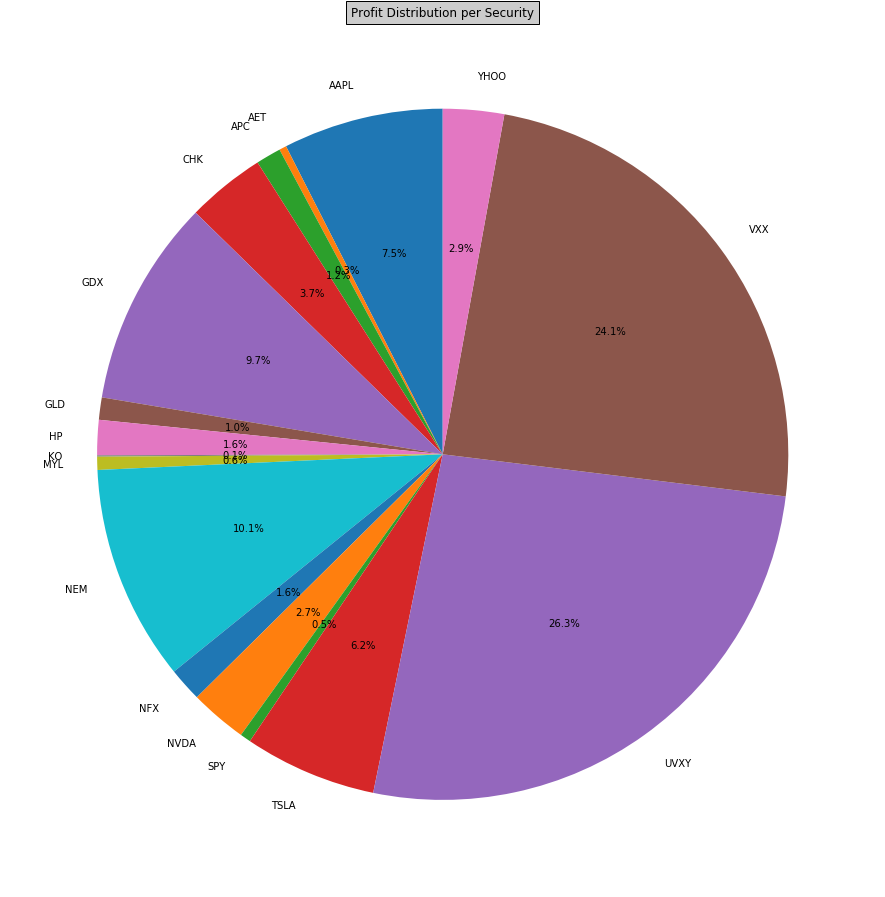

In [48]:
from pylab import *
temp_tot_profit = melted.total_profit.sum()
melted['percentage_profit'] = melted.total_profit/temp_tot_profit
# make a square figure and axes
figure(1, figsize=(15,15))
ax = axes([0.8, 0.8, 0.8, 0.8])


pie(melted.percentage_profit, labels=melted.underlying,
                autopct='%1.1f%%', startangle=90)

title('Profit Distribution per Security', bbox={'facecolor':'0.8', 'pad':5})

show()

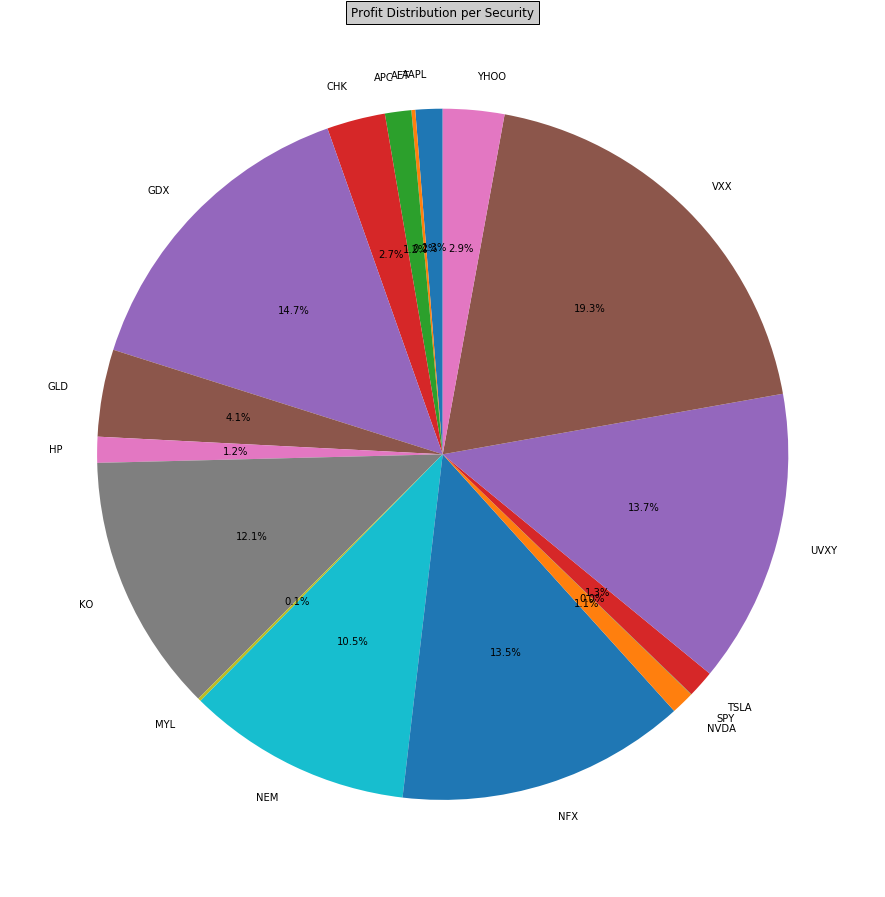

In [50]:
# same thing as the bar graph above
from pylab import *
temp_tot_profit = melted.total_profit.sum()
melted['percentage_profit'] = melted.total_profit/temp_tot_profit
# make a square figure and axes
figure(1, figsize=(15,15))
ax = axes([0.8, 0.8, 0.8, 0.8])


pie(melted.average_holding_period, labels=melted.underlying,
                autopct='%1.1f%%', startangle=90)

title('Average holding period per Security', bbox={'facecolor':'0.8', 'pad':5})

show()

In [63]:

temp=pd.DataFrame(trade.groupby('direction').sum()).reset_index()
temp
output_notebook()
p = Bar(temp, 'direction', values='total_profit', title="Profit in Diretion", color='total_profit',legend=False,\
       xlabel='Total Profit',ylabel='Trade Direction')

show(p,notebook_handle=True)

Loading BokehJS ...

In [79]:
# from bokeh.charts import Scatter, output_file, show
# output_notebook()
# # fig1 =figure(title="Bubble", x_axis_label='Sales Margin', y_axis_label='Sales')
# # # fig1.scatter(df['SM_PER'],df['Sales'], radius = df['Radius'], color=Spectral11, alpha=0.5)
# # fig1.scatter(melted.underlying,melted.average_holding_period, radius = melted['total_profit'], color=melted.underlying, alpha=0.5)
# # show(fig1)
# fig=Scatter(melted,x='underlying',y='average_holding_period',color='total_profit',radius='total_profit')
# show(fig)
from pandas.tools.plotting import scatter_matrix
p=melted.plot.scatter(x='total_profit', y='average_holding_period', s=melted['percentage_profit'])
show(p)

AttributeError: 'AxesSubplot' object has no attribute 'references'

In [145]:
import string
string.ascii_lowercase
'abcdefghijklmnopq'
a=list(string.ascii_lowercase)

my_xticks = ['John','Arnold','Mavis','Matt']
# type(my_xticks)
a=['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p','q']
len(a)
a
# len(melted.underlying)

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q']

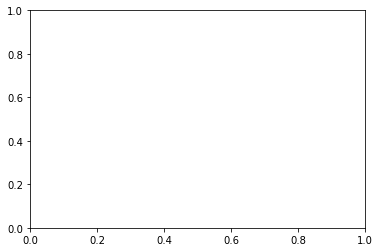

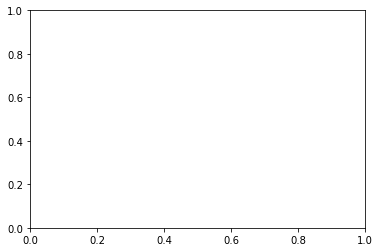

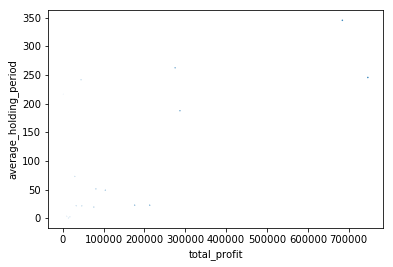

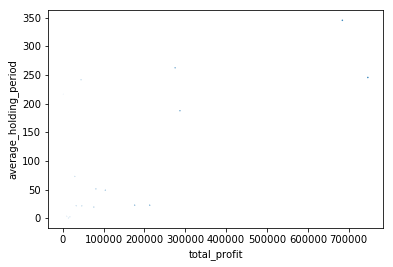

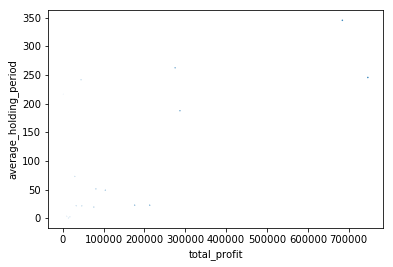

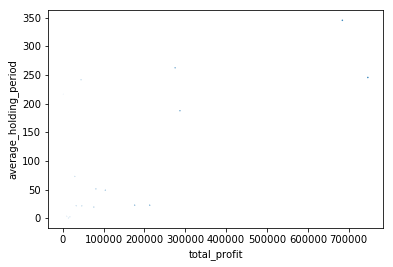

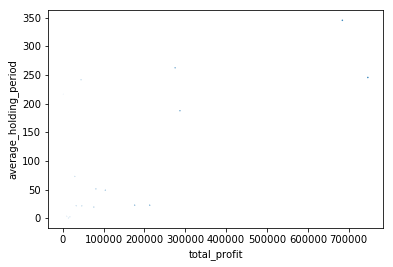

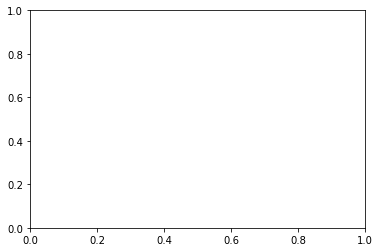

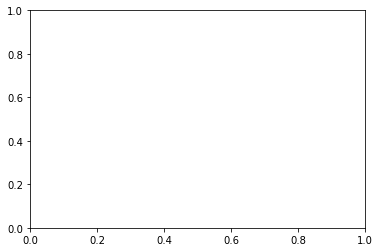

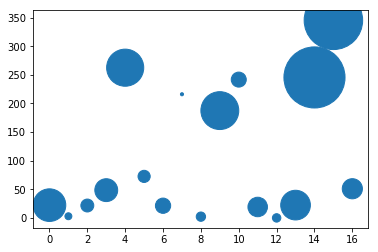

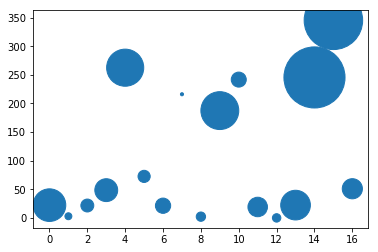

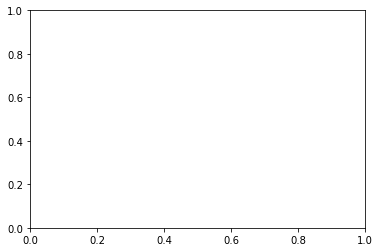

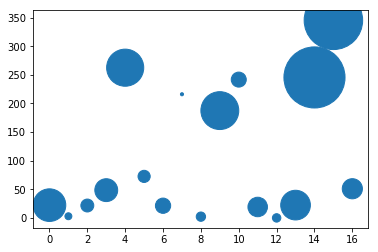

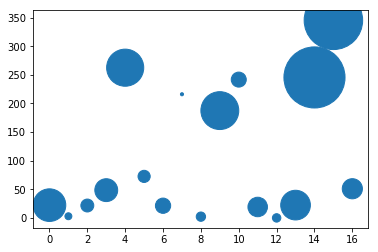

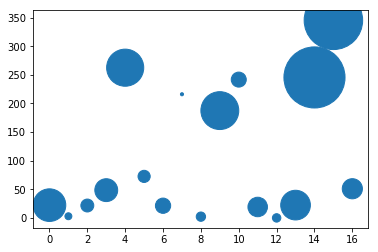

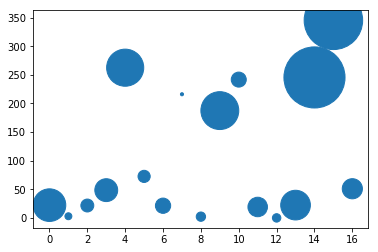

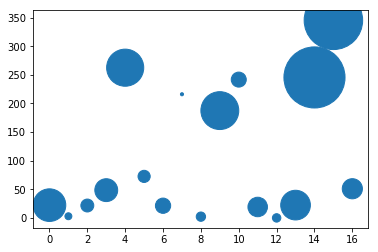

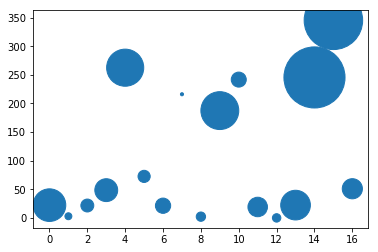

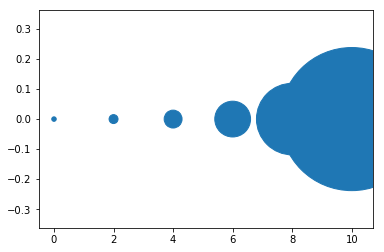

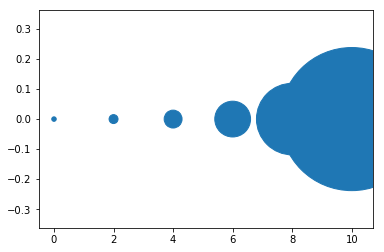

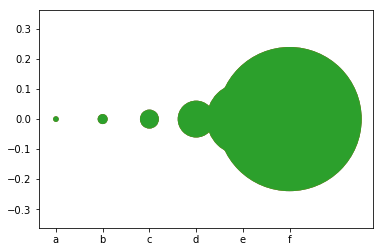

In [152]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly 
plotly.tools.set_credentials_file(username='SaeedRahman6878', api_key='9mr8aNK03tKa41y03bm7')
# py.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')
# bubbles_mpl = plt.figure()
# for c in melted['underlying']:
#     underlying_temp = df2[c].astype('category').cat.codes

# doubling the width of markers
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*4**n for n in range(len(x))]

lab= ['a',
 'b',
 'c',
 'd',
 'e',
 'f']
plt.scatter(x,y,s=s)
plt.xticks(x,a)
# plt.xtick=(melted.index.values,a) #melted.underlying.values.tolist()
# plt.scatter(melted.index.values,melted.average_holding_period.values,s=melted.total_profit/200)

# plt.xticks(melted.index.values,a)
# plt.ticklabel_format(axis='x', style='plain', melted.underlying.values)
# plt.scatter(x,y,s=s)
# plt.Axis.set_ticklabels(melted.underlying.values)
# matplotlib.axis.Axis.set_ticklabels(str(melted.underlying.values),plt,minor=True)
# labels = [item.get_text() for item in plt.get_xticklabels()]
# labels[1] = 'Testing'
# plt.
# plt.set_xticklabels(labels)
# plt.xticks(melted.underlying.values)
plt.show()
# py.iplot_mpl(bubbles_mpl, filename='mpl-bubbles')

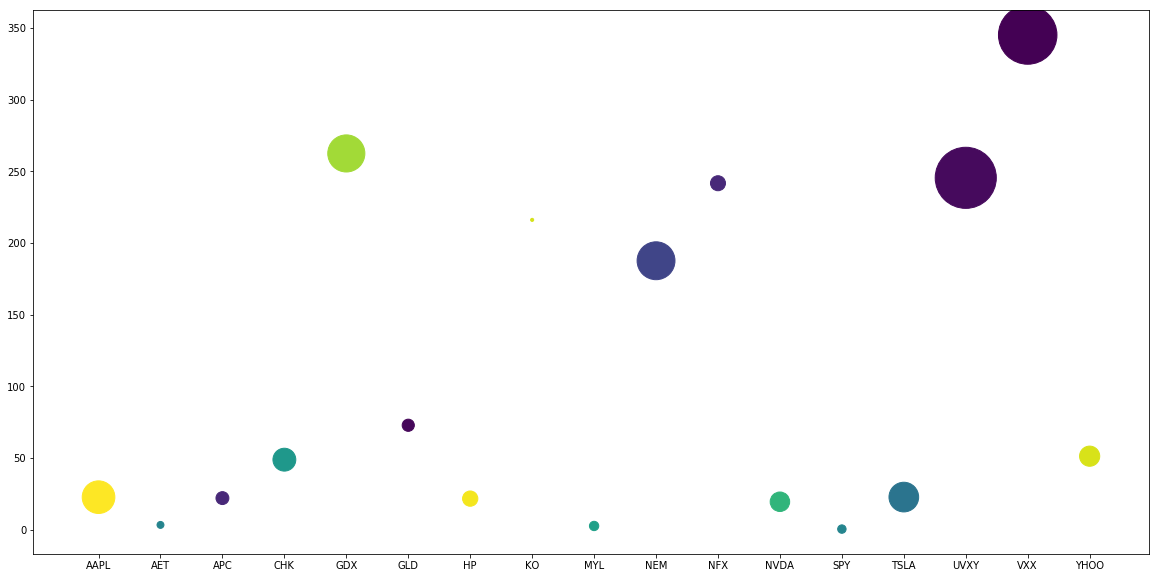

In [217]:
%matplotlib inline
x=melted.index.values
y=melted.average_holding_period.values
s=melted.total_profit.values/200
my_xticks =list(melted.underlying)
# my_xticks = ['John','Arnold','Mavis','Matt']
colors = np.random.rand(len(x))
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks)
plt.scatter(x, y,s=s, c=colors)
# Chart title
plt.title='Bubble Plot of Profit vs Holding Period for Each securities traded'
plt.xlabel='my data'
plt.ylabel='Average Holding Period'
plt.show()

In [234]:
import numpy as np
import pandas as pd
import calmap

all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
# calmap.yearplot(events, year=2015)

2014-11-25   -0.396462
2014-06-21   -0.337842
2014-06-03    1.881811
2014-12-18   -0.006771
2015-02-06    1.358721
2015-08-20    1.041358
2015-02-14    2.185291
2014-03-21   -0.346170
2014-07-30    0.491764
2015-10-26    0.843274
2014-05-02   -1.056550
2015-11-25    1.476469
2015-10-23    0.669697
2015-04-24   -0.416360
2014-06-08   -0.082997
2014-07-27    0.816170
2015-05-20   -0.927246
2014-10-04   -0.526460
2015-04-26    1.716336
2014-04-29   -2.920492
2014-04-14   -0.021355
2015-07-03    0.276884
2014-07-06    1.815711
2014-07-28    0.062930
2014-09-10   -1.010692
2014-11-20   -0.686484
2014-05-15   -1.595460
2015-07-13   -0.892409
2015-06-18    0.295400
2015-03-23   -0.528114
                ...   
2015-08-10    0.292711
2014-10-17   -0.751191
2014-08-26   -1.253705
2015-09-27   -0.833859
2015-01-22    1.251737
2014-04-12   -0.641755
2015-12-14    0.052641
2015-08-23    0.697359
2015-05-01    0.376763
2015-10-04    1.836111
2015-02-26    1.742231
2015-04-18   -0.339593
2015-11-08 

C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:128: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:146: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



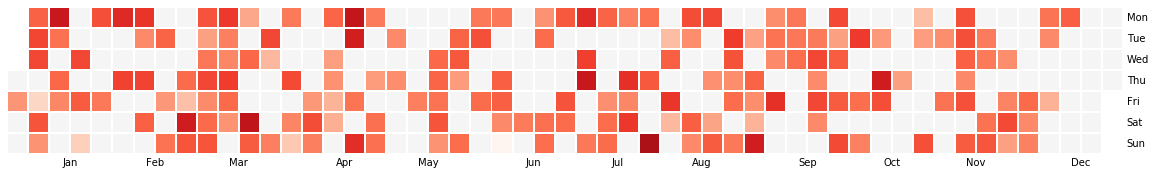

In [230]:
plt.figure(figsize=(20,10))
calmap.yearplot(events, year=2015)

C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:128: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()

C:\ProgramData\Anaconda3\lib\site-packages\calmap\__init__.py:146: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.



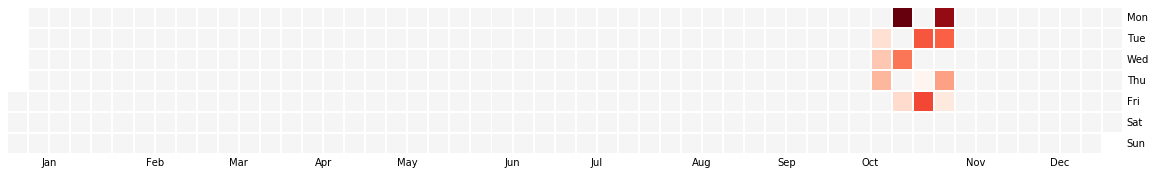

In [242]:
trade
cal=pd.Series(trade.total_profit.values,index=trade.start_time)
cal
plt.figure(figsize=(20,10))
calmap.yearplot(cal, year=2016)